Assignment-4   
Simran Tanwar                                                    
20D070078  

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q1. Study the challenge statement of MoNuSeg challenge, read the data and display a few training and testing
images and their masks (black background, and a random color for each cell nucleus). 
(a)Training image of Tissue-Images and Binary-Mask
(b)Testing image of Tissue-Images and Binary-Mask

Source:https://youtu.be/M3EZS__Z_XE
and https://github.com/nikhilroxtomar/UNet-Segmentation-in-Keras-TensorFlow/blob/master/unet-segmentation.ipynb

In [ ]:
## Importing different libraries
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding 
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [ ]:
class DataGen(keras.utils.Sequence):
    def __init__(self, ids, path, batch_size=8, image_size=128):
        self.ids = ids #training_ids 
        self.path = path# taking path of folder of training ids
        self.batch_size = batch_size#no. of images it take in one go
        self.image_size = image_size#size of each image(which should be same)
        self.on_epoch_end()#no. of times we train the data
        
    def __load__(self, id_name):
        ## Path
        image_path = os.path.join(self.path,"Tissue-Images",id_name)#path of the image
        mask_path = os.path.join(self.path,"Binary-Mask",id_name)#path oof mask
        
        ## Reading Image
        image = cv2.imread(image_path, 1)
        image = cv2.resize(image, (self.image_size, self.image_size))
      
        ## Reading Masks
        _mask_image = cv2.imread(mask_path, 0)
        _mask_image = cv2.resize(_mask_image, (self.image_size, self.image_size)) #128x128
        _mask_image = np.expand_dims(_mask_image, axis=-1)#to make it equal to the dimension of image
            
        ## Normalizaing 
        image = image/255.0
        _mask_image = _mask_image/255.0
        
        return image, _mask_image
    
    def __getitem__(self, index):
        if(index+1)*self.batch_size > len(self.ids):
            self.batch_size = len(self.ids) - index*self.batch_size# for a particular batch size, we need particular no. of images at one time 
            #training the data
        
        files_batch = self.ids[index*self.batch_size : (index+1)*self.batch_size]#file containing the images
        
        image = []
        _mask_image  = []# created an empty array of the images in files_batch
        
        for id_name in files_batch:
            _img, _mask = self.__load__(id_name)
            image.append(_img)
            _mask_image.append(_mask)#appending all the images in the array
            
        image = np.array(image)
        _mask_image  = np.array(_mask_image)
        
        return image, _mask_image
    
    def on_epoch_end(self):
        pass
    
    def __len__(self):
        return int(np.ceil(len(self.ids)/float(self.batch_size)))#used for no. of iterations

In [ ]:
image_size = 128
train_path = "/content/drive/MyDrive/EE610/assignment4/MoNuSeg-Training-Data/"
test_path = "/content/drive/MyDrive/EE610/assignment4/MoNuSeg-Test-Data/"
epochs = 5
batch_size = 1

## Training Ids
train_ids = next(os.walk(train_path + "Binary-Mask/"))[2]
#testing data is the output we expected after running the ML model, we check the difference between training data and testing data after training the model.
test_ids = next(os.walk(test_path + "Binary-Mask/"))[2]
## Validation Data Size
#validation data is the data that we choose from training data only and check the difference between them, this we do during training.
val_data_size = 4

valid_ids = train_ids[:val_data_size]
train_ids = train_ids[val_data_size:]
print("training ids:")
print(train_ids)
print("No. of training ids:")
print(len(train_ids))
print("testing ids:")
print(test_ids)
print("No. of testing ids:")
print(len(test_ids))

training ids:
['TCGA-49-4488-01Z-00-DX1.png', 'TCGA-50-5931-01Z-00-DX1.png', 'TCGA-A7-A13E-01Z-00-DX1.png', 'TCGA-A7-A13F-01Z-00-DX1.png', 'TCGA-AR-A1AK-01Z-00-DX1.png', 'TCGA-AR-A1AS-01Z-00-DX1.png', 'TCGA-AY-A8YK-01A-01-TS1.png', 'TCGA-B0-5698-01Z-00-DX1.png', 'TCGA-B0-5710-01Z-00-DX1.png', 'TCGA-B0-5711-01Z-00-DX1.png', 'TCGA-CH-5767-01Z-00-DX1.png', 'TCGA-DK-A2I6-01A-01-TS1.png', 'TCGA-E2-A1B5-01Z-00-DX1.png', 'TCGA-E2-A14V-01Z-00-DX1.png', 'TCGA-G2-A2EK-01A-02-TSB.png', 'TCGA-G9-6336-01Z-00-DX1.png', 'TCGA-G9-6348-01Z-00-DX1.png', 'TCGA-G9-6356-01Z-00-DX1.png', 'TCGA-G9-6362-01Z-00-DX1.png', 'TCGA-G9-6363-01Z-00-DX1.png', 'TCGA-HE-7128-01Z-00-DX1.png', 'TCGA-HE-7129-01Z-00-DX1.png', 'TCGA-HE-7130-01Z-00-DX1.png', 'TCGA-KB-A93J-01A-01-TS1.png', 'TCGA-NH-A8F7-01A-01-TS1.png', 'TCGA-RD-A8N9-01A-01-TS1.png']
No. of training ids:
26
testing ids:
['TCGA-2Z-A9J9-01A-01-TS1.png', 'TCGA-44-2665-01B-06-BS6.png', 'TCGA-69-7764-01A-01-TS1.png', 'TCGA-A6-6782-01A-01-BS1.png', 'TCGA-AC-A2FO-01A

In [ ]:
gen = DataGen(train_ids, train_path, batch_size=batch_size, image_size=image_size)
x, y = gen.__getitem__(0)
x1, y1 = gen.__getitem__(1)# getting the training image i.e. input image and mask image
print("training image1:")
print(x.shape, y.shape)
print("training image2:")
print(x1.shape, y1.shape)#printing the shapes of input and mask image

training image1:
(1, 128, 128, 3) (1, 128, 128, 1)
training image2:
(1, 128, 128, 3) (1, 128, 128, 1)


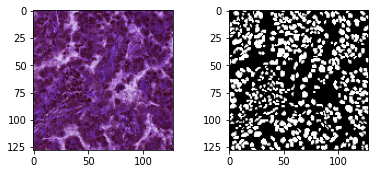

In [ ]:
#Input image and mask image
r = 0
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y[r], (image_size, image_size)), cmap="gray")#printing the shapes of input and mask image

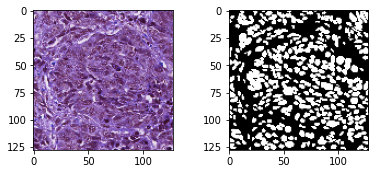

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(x1[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(y1[r], (image_size, image_size)), cmap="gray")

Testing image data:

In [ ]:
gen = DataGen(test_ids, test_path, batch_size=batch_size, image_size=image_size)
a, b = gen.__getitem__(0)
a1, b1 = gen.__getitem__(1)# getting the testing image i.e.desired output image and mask image
print("testing image1:")
print(a.shape, b.shape)
print("testing image2:")
print(a1.shape, b1.shape)#printing the shapes of testing and mask image

testing image1:
(1, 128, 128, 3) (1, 128, 128, 1)
testing image2:
(1, 128, 128, 3) (1, 128, 128, 1)


Testing images:

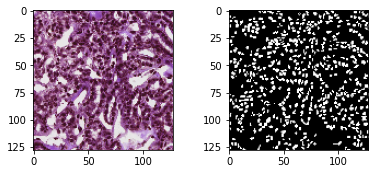

In [ ]:
r = 0
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(a[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(b[r], (image_size, image_size)), cmap="gray")

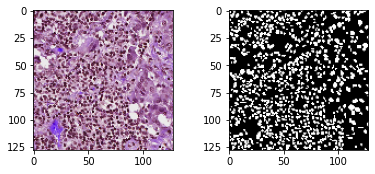

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
ax.imshow(a1[r])
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(b1[r], (image_size, image_size)), cmap="gray")

Q2. Code a basic UNet for semantic segmentation in TF+Keras or Pytorch for the binary nucleus vs. non-nucleus
segmentation. You may leave a small margin of pixels all around the image from the output.

Unet source from-https://github.com/nikhilroxtomar/UNet-Segmentation-in-Keras-TensorFlow/blob/master/unet-segmentation.ipynb

In [ ]:
#It consists of two 3x3 convolutions (unpadded convolutions),
# each followed by a rectified linear unit (ReLU) and a 2x2 max pooling operation with stride 2 for downsampling.
#At each downsampling step we double the number of feature channels.
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

#Every step in the expansive path consists of an upsampling of the feature map followed by a 2x2 convolution (“up-convolution”),
# a concatenation with the correspondingly feature map from the downsampling path, and two 3x3 convolutions, each followed by a ReLU.
def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c
#It is the base part of the U shape in Unet segmentation
def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [ ]:
def UNet():
    f = [8,16, 32, 64, 128, 256,512]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #256-> 128
    c2, p2 = down_block(p1, f[1]) #128 -> 64
    c3, p3 = down_block(p2, f[2]) #64 -> 32
    c4, p4 = down_block(p3, f[3]) #32 -> 16
    c5, p5 = down_block(p4, f[4]) #16 -> 8
    c6, p6 = down_block(p5, f[5]) #8 -> 4
    
    bn = bottleneck(p6, f[6])
    
    u1 = up_block(bn, c6, f[5]) #4 -> 8
    u2 = up_block(u1, c5, f[4]) #8 -> 16
    u3 = up_block(u2, c4, f[3]) #16 -> 32
    u4 = up_block(u3, c3, f[2]) #32 -> 64
    u5 = up_block(u4, c2, f[1]) #64 -> 128
    u6 = up_block(u5, c1, f[0]) #128 -> 256
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u6)
    model = keras.models.Model(inputs, outputs)
    return model

In [ ]:
#source:dice_loss_for_keras.GitHub
# define custom loss and metric functions 

from keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    """
    Dice = (2*|X & Y|)/ (|X|+ |Y|)
         =  2*sum(|A*B|)/(sum(A^2)+sum(B^2))
    ref: https://arxiv.org/pdf/1606.04797v1.pdf
    """
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (K.sum(K.square(y_true),-1) + K.sum(K.square(y_pred),-1) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

In [ ]:
model = UNet()
model.compile(optimizer="adam", loss=dice_coef_loss , metrics=["acc",dice_coef])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_54 (Conv2D)             (None, 128, 128, 8)  224         ['input_3[0][0]']                
                                                                                                  
 conv2d_55 (Conv2D)             (None, 128, 128, 8)  584         ['conv2d_54[0][0]']              
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 64, 64, 8)   0           ['conv2d_55[0][0]']        

In [ ]:
train_gen = DataGen(train_ids, train_path, image_size=image_size, batch_size=batch_size)
valid_gen = DataGen(valid_ids, train_path, image_size=image_size, batch_size=batch_size)

train_steps = len(train_ids)//batch_size
valid_steps = len(valid_ids)//batch_size

model.fit_generator(train_gen, validation_data=valid_gen, steps_per_epoch=train_steps, validation_steps=valid_steps, 
                    epochs=epochs)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


26/26 [==============================] - 5s 187ms/step - loss: 0.0881 - acc: 0.7137 - dice_coef: 0.9119 - val_loss: 0.1119 - val_acc: 0.6533 - val_dice_coef: 0.8881
Epoch 2/5
26/26 [==============================] - 5s 186ms/step - loss: 0.0818 - acc: 0.7137 - dice_coef: 0.9182 - val_loss: 0.0948 - val_acc: 0.6535 - val_dice_coef: 0.9052
Epoch 3/5
26/26 [==============================] - 5s 182ms/step - loss: 0.0751 - acc: 0.7272 - dice_coef: 0.9249 - val_loss: 0.0933 - val_acc: 0.6855 - val_dice_coef: 0.9067
Epoch 4/5
26/26 [==============================] - 5s 183ms/step - loss: 0.0717 - acc: 0.7674 - dice_coef: 0.9283 - val_loss: 0.0831 - val_acc: 0.7322 - val_dice_coef: 0.9169
Epoch 5/5
26/26 [==============================] - 5s 183ms/step - loss: 0.0663 - acc: 0.7892 - dice_coef: 0.9337 - val_loss: 0.0764 - val_acc: 0.7632 - val_dice_coef: 0.9236


In [ ]:
## Save the Weights
model.save_weights("UNetW.h5")

## Dataset for prediction
x, y = valid_gen.__getitem__(1)
x1, y1 = valid_gen.__getitem__(2)
result = model.predict(x)
result1 = model.predict(x1)

result = result > 0.5
result1 = result1 > 0.5

1/1 [==============================] - 0s 46ms/step


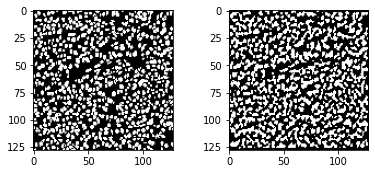

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result[0]*255, (image_size, image_size)), cmap="gray")

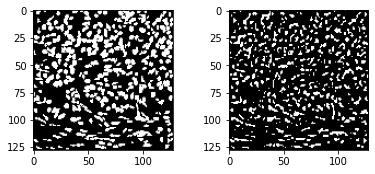

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.reshape(y1[0]*255, (image_size, image_size)), cmap="gray")

ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result1[0]*255, (image_size, image_size)), cmap="gray")
